# Tree Regressors - sklearn
- Compared with Linear and Ridge.
- Example of Hyperparameter tunning.

##### Import libraries

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data - Not cleaned

In [9]:
# load the training dataset 
bike_data = pd.read_csv('../../DATA/daily-bike-share.csv')

# Add DAY column.
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day

# Numerical Features:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']

# Categorical Features:
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

# Overall describe method:
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  


### Prepare Training and Test datasets
* After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.

In [10]:
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


### Decision Tree Regressor
* PROS
- - Usable for categorical and numerical variables and it actually does not require a normalization step.
- - It is able to spot linear and non-linear relationships.
- - Easy to explain to stakeholders.
- - Works consistently with high dimensions.

* CONS
- - A little change in the data can become unstable if it changes the structures of the predictors.
- - Training time consuming.
- - A little Decision Tree has high bias and low variance in the nodes. A big tree has low bias but high variance in the nodes.
- - This is why, the Trade-Off (Balance) is important to be found -> by using Random Forest.

* The predictors are key, they decide the structure of the tree. They are chosen minimizing the entropy (inpurity) when splitting the branches from a parent node to its children. Once the entropies for each new proposed branch is calculated, only the one with higher Information Gain will be chosen. 
* A good predictor splits the data creating "pure" children, with low entropy ( The Lables of this new branch belong to only 1 class. )
- - Less Impurity = Low Entropy = More Predictiveness.
* Entropy: It ranks between {0, 1} and explains the quantity of "Randomness" in the data. Example:
- - 6 rows labeled 0 and 1 row labeled 1, will have low entropy. Meanwhile, 4 rows labeled 1 and 4 rows labeled 0 have a Maximum Entropy = 1.
* Information Gain: Inverse to Entropy. Information that can add certainty when splitting branches.
- - Information Gain: Entropy of the tree before splitting into a new branch.
- - Weighted Entropy (WE): Entropy of the tree after splitting into the new selected branch.
- - WE = ( num( label = 0 ) / num( labels ) * Entropy( left branch )) + ( num( label = 1 ) / num( labels ) * Entropy( right branch ) )

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_3 <= 3.00
|   |   |   |   |   |   |--- feature_9 <= 0.22
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_9 >  0.22
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |--- feature_3 >  3.00
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_9 <= 0.28
|   |   |   |   |   |   |--- feature_9 <= 0.22
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |   |--- feature_9 >  0.22
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |--- feature_9 >  0.28
|   |   |   |   |   |   |--- feature_1 <= 7.00
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_1 >  7.00
|   |   |   |   |   |   |   |--- val

MSE: 235794.16363636364
RMSE: 485.58641212081255
R2: 0.5377403414915394


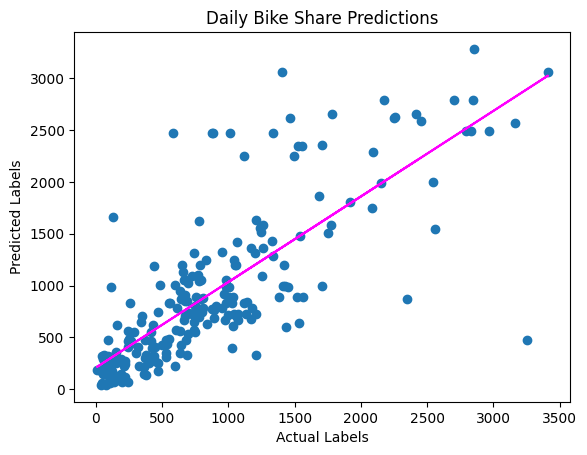

In [12]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Seems like the Decision Tree did not improve our previous predictions with Ridge or Linear Regressions.

## Ensemble Algorithm - Random Forest

RandomForestRegressor() 

MSE: 113215.63913318183
RMSE: 336.4753172718347
R2: 0.7780478453053163


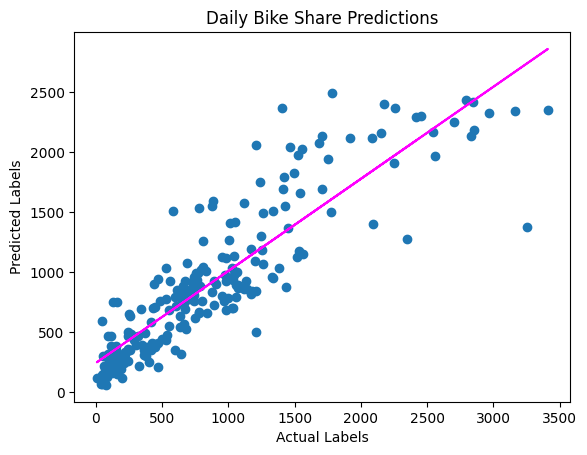

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

For good measure, let's also try a boosting ensemble algorithm.

## Gradient Boosting Estimator
* A Gradient Boosting Estimator, like a Random Forest algorithm, builds multiple trees.
* However, instead of building them all independently and taking the average result...
* ... each tree is built on the outputs of the previous one in an attempt to incrementally reduce the loss (error) in the model.

GradientBoostingRegressor(n_estimators=50) 

MSE: 109600.34087932938
RMSE: 331.05942197637177
R2: 0.7851354106227062


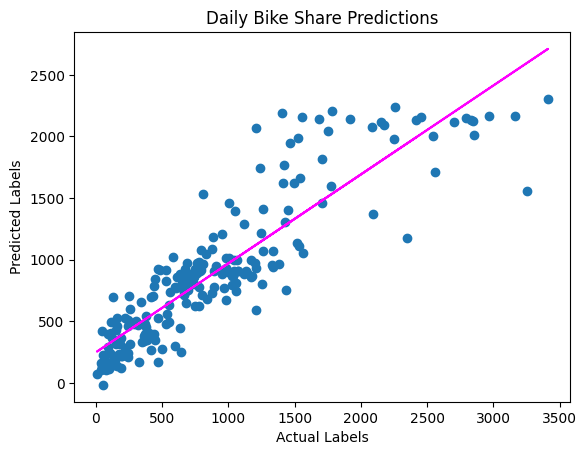

In [31]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor(n_estimators = 50).fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [32]:
n_estimators = model.n_estimators_
learning_rate = model.learning_rate
print(
    f"R2 score : {r2} with n_estimators : {n_estimators} and learning rate : {learning_rate}"
)

R2 score : 0.7851354106227062 with n_estimators : 50 and learning rate : 0.1


The gradient boosting regressor seem to fit the data with a higher r2_score compared to Linear, Ridge and a Decision Tree Regression, but...

Is there a better hyperparameter combination?

## Optimize Hyperparameters

* P*arameters: values that can be determined from data.
* Hyperparameters: values that you specify to affect the behavior of a training algorithm.

* GradientBoostingRegressor estimator is an ensemble that combines multiple decision trees to create an overall predictive model.
* SciKit-Learn provides a way to tune hyperparameters by trying multiple combinations and finding the best result for a given performance metric.

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 


Model with lower r2_score is : GradientBoostingRegressor()

MSE: 104165.59589098216
RMSE: 322.74695334113096
R2: 0.7957898870679685


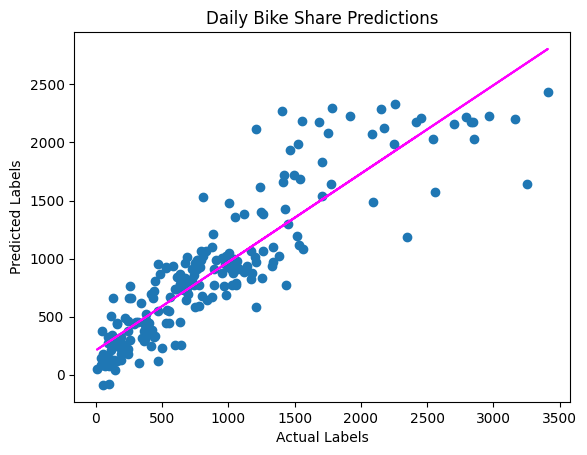

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer

# Use a Gradient Boosting algorithm
model_ = GradientBoostingRegressor()

# Some parameters may modify:
# - Loss
# - Entropy
# - learning rate
# - etc...

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)

# Split training data set into 3 Cross-Validation approaches:
gridsearch = GridSearchCV(model_, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(f"\nModel with lower r2_score is : {model}\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

After performing the Grid Search technique, we realize that we can obtain a higher R2 score using n_estimators = 100 and learning rate = 0.1.